# Final Project

- Neural Network 

- PCA and Clustering

- Ensemble Method
How are feature correlations different from feature importance? Is there a way to determine feature importance for random forest similar to boosted trees? What do the features mean in the context of your question? Why didn't you tune your models? This is usually a requirement for any boosted or bagging method. RMSE is a much better indicator of goodness of fit than R squared so focus on this. RMSE is MUCH smaller for boosted trees. Why? Is this in the same scale or did the package maybe standardize your data? 


- Penalized Regression 
Good dataset for the task and appropriate implementation. What are your coefficients and what do they mean? How are you supposed to know the relationship between your independent and dependent variables if you don't print your summaries? What does an MSE of 1.89 mean? Think deeper about your limitations. More important than the limitations of the model are the limitations of your data. How is the data collected? Which variables are included? What do these tell you about how you can apply your analysis in the real world? And for robustness checks, these aren't robustness checks of the method like CV hyperparameter tuning. These should be acknowledging what decisions you made (for example, how to deal with unknown) and whether your conclusions change based on these decisions.


- SVM 
Why didn't you do cross validation to select your hyperparameters? Gamma is also a hyperparameter for rbf but you didn't even specify that. You could also have specified a metric suitable to an imbalanced dataset like F1. None of that would have taken very long and would have allowed you to create a functional model. As is, just guessing no for every test item would be about twice as accurate as your model. Make sure to address how to ensure your conclusions are robust, not just your model.

# Table of Contents

- [Important Packages](#importing-packages)
- [Loading Data](#loading-data)
- [Data Exploration](#data-exploration)
- [Cleaning Data](#cleaning-data)



# Importing Packages

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Loading Data

In [4]:
# Add File Path of the CSV file here
# file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
file_path = "C:/Users/matt/Downloads/archive (2)/Electronic_sales_Sep2023-Sep2024.csv"
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Data Exploration

## Summary Statistics

In [5]:
# Explore the data
# Display the first few rows
print("First few rows of the data:")
display(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First few rows of the data:


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56



Data types:
Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Order Status          object
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
dtype: object

Summary statistics:


,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000



Missing values in each column:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


## Histograms of Numeric Variables

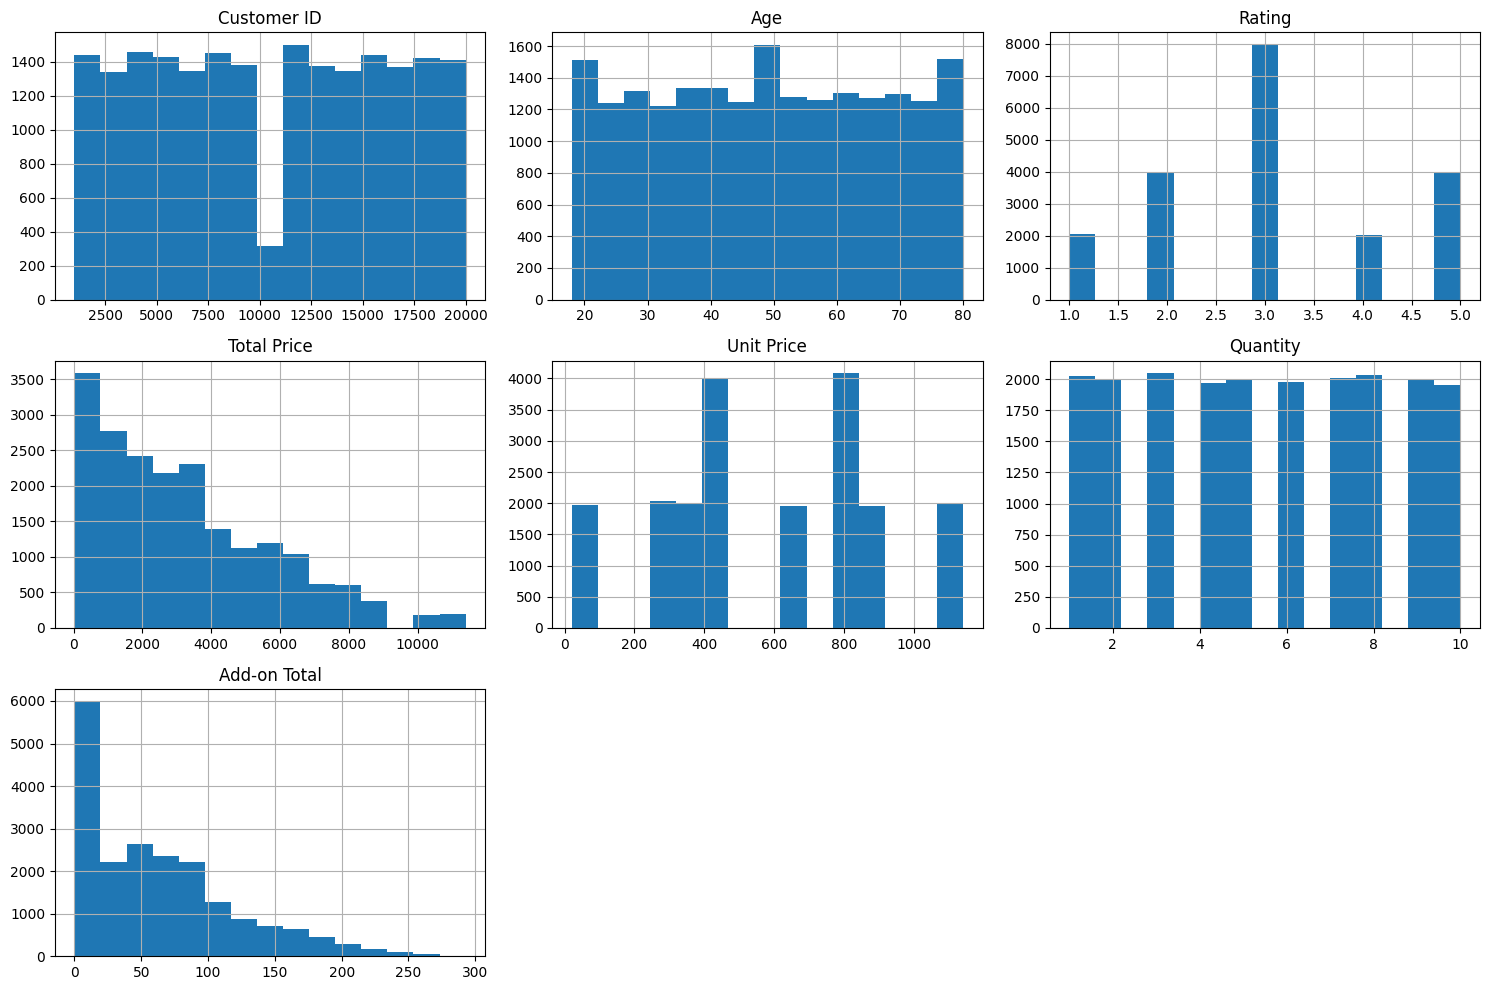

In [6]:
# Histograms of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

## Heatmap of Numeric Variables

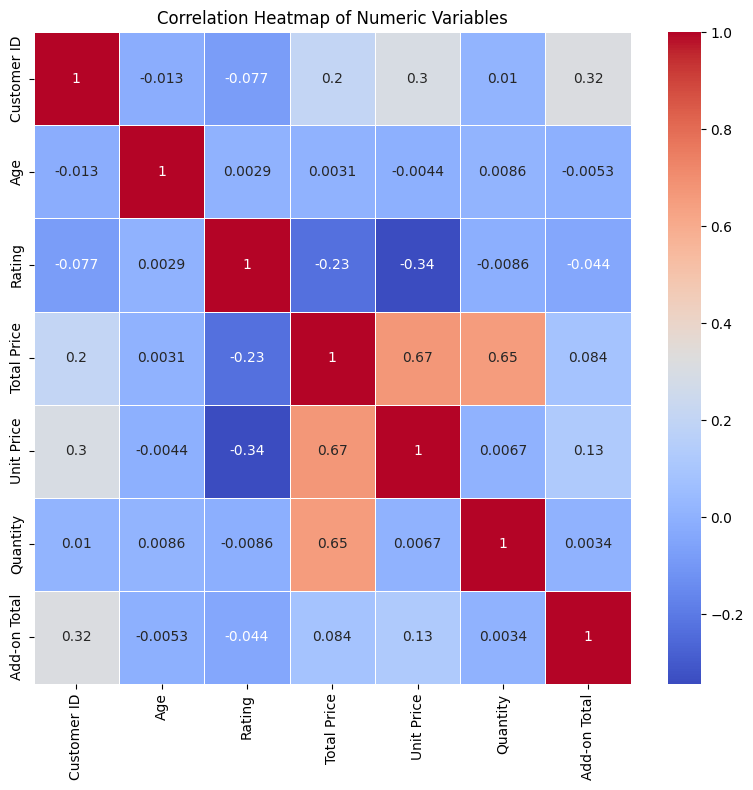

In [7]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot a heatmap of correlations between numeric variables
plt.figure(figsize=(8, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Cleaning Data

In [8]:
# Fill missing values in 'Add-ons Purchased' with a default value of 0, easy fix since there's only one missing value.
df['Add-ons Purchased'].fillna(0, inplace=True)

# Identify categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode all categorical features
df = pd.get_dummies(df, columns=categorical_columns)

# Label encode 'Gender' and other binary categorical features
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender'])
if 'Loyalty Member' in df.columns:
    df['Loyalty Member'] = le.fit_transform(df['Loyalty Member'])

# Verify that all features are numerical
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Non-numeric column found: {column}")